In [ ]:
# targets, do we bucket
#   one day at a time
#       all stocks
#   all days
#       on stock
#       all stocks

# features, do we bucket
#   one day at a time
#       all stocks
#   all days
#       on stock
#       all stocks

# TODO
# - explore each of the 3x3 above
# -> if we train {single stock's features bucketed value -> single stock's target bucketed value} we should get a better model but it will predict very well possibly low stock returns. This will give a better model.

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from config import NAME, read_config
from data import read_features_data, write_features_data
from features import calc_features, align_targets_and_features, generate_training_test_data
from targets import calc_targets
from my_logger import get_logger

logger = get_logger()

config_name = 'base'
config = read_config(config_name)

2024-11-28 16:34:10,495 |     INFO | config.py:80 | Reading config: base


In [2]:
targets_bucketed, targets_signed, stock_returns = calc_targets(config, True)
print(f"targets_bucket'{targets_bucketed.shape}', num NaN'{targets_bucketed.isna().sum().sum()}'.")
print(f"target_signed'{targets_signed.shape}', num NaN'{targets_signed.isna().sum().sum()}'.")
print(f"stock_returns'{stock_returns.shape}', num NaN'{stock_returns.isna().sum().sum()}'.")

2024-11-28 16:36:50,467 |  WARNING | targets.py:161 | Bucketed returns:                      AAPL  ADBE  AIG  ALL  AMD  AMAT  AMGN  AMZN  AON  APD  \
date_time                                                                    
2021-12-27 14:30:00     0     0    0    4    0     0     0     0    0    0   
2022-01-03 14:30:00     0     0    4    4    0     0     0     0    0    0   
2022-01-10 14:30:00     0     4    0    0    4     4     4     0    0    0   
2022-01-17 14:30:00     0     0    0    0    0     0     4     0    4    0   
2022-01-24 14:30:00     4     4    0    0    0     0     0     0    0    0   
...                   ...   ...  ...  ...  ...   ...   ...   ...  ...  ...   
2024-08-26 14:30:00     0     4    0    4    0     0     0     0    4    0   
2024-09-02 14:30:00     0     0    0    0    0     0     0     0    0    0   
2024-09-09 14:30:00     0     0    0    0    4     4     0     4    0    4   
2024-09-16 14:30:00     4     0    0    0    0     4     0     0    0 

targets_bucket'(144, 126)', num NaN'0'.
target_signed'(144, 126)', num NaN'0'.
stock_returns'(144, 126)', num NaN'0'.


In [3]:
print(f"targets_bucketed\n{targets_bucketed}")
print(f"targets_signed\n{targets_signed}")
print(f"stock_returns\n{stock_returns}")

targets_bucketed
                     AAPL  ADBE  AIG  ALL  AMD  AMAT  AMGN  AMZN  AON  APD  \
date_time                                                                    
2021-12-27 14:30:00     0     0    0    4    0     0     0     0    0    0   
2022-01-03 14:30:00     0     0    4    4    0     0     0     0    0    0   
2022-01-10 14:30:00     0     4    0    0    4     4     4     0    0    0   
2022-01-17 14:30:00     0     0    0    0    0     0     4     0    4    0   
2022-01-24 14:30:00     4     4    0    0    0     0     0     0    0    0   
...                   ...   ...  ...  ...  ...   ...   ...   ...  ...  ...   
2024-08-26 14:30:00     0     4    0    4    0     0     0     0    4    0   
2024-09-02 14:30:00     0     0    0    0    0     0     0     0    0    0   
2024-09-09 14:30:00     0     0    0    0    4     4     0     4    0    4   
2024-09-16 14:30:00     4     0    0    0    0     4     0     0    0    0   
2024-09-23 14:30:00     0     0    0    0    4 

In [4]:
features = calc_features(config, targets_bucketed.index)
print(f"features'{features.shape}', num NaN'{features.isna().sum().sum()}'.")
# print(f"features\n{features}")

2024-11-28 16:45:05,743 |     INFO | features.py:208 | Calculated indicators for:'AAPL'.
2024-11-28 16:45:07,283 |     INFO | features.py:208 | Calculated indicators for:'ADBE'.
2024-11-28 16:45:08,807 |     INFO | features.py:208 | Calculated indicators for:'AIG'.
2024-11-28 16:45:10,345 |     INFO | features.py:208 | Calculated indicators for:'ALL'.
2024-11-28 16:45:11,895 |     INFO | features.py:208 | Calculated indicators for:'AMD'.
2024-11-28 16:45:13,356 |     INFO | features.py:208 | Calculated indicators for:'AMAT'.
2024-11-28 16:45:14,842 |     INFO | features.py:208 | Calculated indicators for:'AMGN'.
2024-11-28 16:45:16,304 |     INFO | features.py:208 | Calculated indicators for:'AMZN'.
2024-11-28 16:45:17,783 |     INFO | features.py:208 | Calculated indicators for:'AON'.
2024-11-28 16:45:19,288 |     INFO | features.py:208 | Calculated indicators for:'APD'.
2024-11-28 16:45:20,777 |     INFO | features.py:208 | Calculated indicators for:'AVGO'.
2024-11-28 16:45:22,325 | 

features'(140, 7686)', num NaN'756'.


In [5]:
features = read_features_data(config_name, 'features_per_stock_by_date_2024-11-17T20:45:39.pkl')

In [9]:
# targets.drop(columns=['1'])
X, y_bucketed = align_targets_and_features(config, features, targets_bucketed)
print(f"y'{y_bucketed.shape}', X'{X.shape}'.")

2024-11-28 16:51:35,250 |     INFO | features.py:274 | Indices do not match! num of rows, features:'140', targets:'144'
2024-11-28 16:51:35,257 |     INFO | features.py:279 | 
Rows in features but not in targets:
DatetimeIndex([], dtype='datetime64[ns]', name='date_time', freq='W-MON')
2024-11-28 16:51:35,258 |     INFO | features.py:280 | 
Rows in targets but not in features:
DatetimeIndex(['2021-12-27 14:30:00', '2022-01-03 14:30:00',
               '2022-01-10 14:30:00', '2022-01-17 14:30:00'],
              dtype='datetime64[ns]', name='date_time', freq=None)
2024-11-28 16:51:35,278 |     INFO | features.py:285 | 
Different rows in features:
Empty DataFrame
Columns: [(adx, AAPL), (adx, ADBE), (adx, AIG), (adx, ALL), (adx, AMD), (adx, AMAT), (adx, AMGN), (adx, AMZN), (adx, AON), (adx, APD), (adx, AVGO), (adx, AXP), (adx, BAC), (adx, BABA), (adx, BAX), (adx, BBY), (adx, BDX), (adx, BIIB), (adx, BLK), (adx, BMY), (adx, BK), (adx, CB), (adx, C), (adx, CHD), (adx, CI), (adx, CINF), (adx

y'(140, 126)', X'(140, 7686)'.


In [10]:
# targets.drop(columns=['1'])
X, y_signed = align_targets_and_features(config, features, targets_signed)
print(f"y'{targets_signed.shape}', X'{X.shape}'.")

2024-11-28 16:51:37,320 |     INFO | features.py:274 | Indices do not match! num of rows, features:'140', targets:'144'
2024-11-28 16:51:37,322 |     INFO | features.py:279 | 
Rows in features but not in targets:
DatetimeIndex([], dtype='datetime64[ns]', name='date_time', freq='W-MON')
2024-11-28 16:51:37,324 |     INFO | features.py:280 | 
Rows in targets but not in features:
DatetimeIndex(['2021-12-27 14:30:00', '2022-01-03 14:30:00',
               '2022-01-10 14:30:00', '2022-01-17 14:30:00'],
              dtype='datetime64[ns]', name='date_time', freq=None)
2024-11-28 16:51:37,335 |     INFO | features.py:285 | 
Different rows in features:
Empty DataFrame
Columns: [(adx, AAPL), (adx, ADBE), (adx, AIG), (adx, ALL), (adx, AMD), (adx, AMAT), (adx, AMGN), (adx, AMZN), (adx, AON), (adx, APD), (adx, AVGO), (adx, AXP), (adx, BAC), (adx, BABA), (adx, BAX), (adx, BBY), (adx, BDX), (adx, BIIB), (adx, BLK), (adx, BMY), (adx, BK), (adx, CB), (adx, C), (adx, CHD), (adx, CI), (adx, CINF), (adx

y'(144, 126)', X'(140, 7686)'.


In [11]:
print(f"features, X, file name:'{write_features_data('features', config[NAME], X)}'.")
print(f"y_bucketed, y, file name:'{write_features_data('targets_bucketed', config[NAME], y_bucketed)}'.")
print(f"targets_signed, y, file name:'{write_features_data('targets_signed', config[NAME], y_signed)}'.")
print(f"stock_returns, file name:'{write_features_data('stock_returns', config[NAME], stock_returns)}'.")


2024-11-28 16:51:44,785 |     INFO | data.py:115 | Writing model file to: /Users/stephanie/src/N-LASR-model/data/model/base/features_2024-11-28T16:51:44.pkl
2024-11-28 16:51:44,801 |     INFO | data.py:115 | Writing model file to: /Users/stephanie/src/N-LASR-model/data/model/base/targets_bucketed_2024-11-28T16:51:44.pkl
2024-11-28 16:51:44,803 |     INFO | data.py:115 | Writing model file to: /Users/stephanie/src/N-LASR-model/data/model/base/targets_signed_2024-11-28T16:51:44.pkl
2024-11-28 16:51:44,806 |     INFO | data.py:115 | Writing model file to: /Users/stephanie/src/N-LASR-model/data/model/base/stock_returns_2024-11-28T16:51:44.pkl


features, X, file name:'features_2024-11-28T16:51:44.pkl'.
y_bucketed, y, file name:'targets_bucketed_2024-11-28T16:51:44.pkl'.
targets_signed, y, file name:'targets_signed_2024-11-28T16:51:44.pkl'.
stock_returns, file name:'stock_returns_2024-11-28T16:51:44.pkl'.


In [12]:
# X = read_features_data(config_name, 'features_2024-11-18T14:14:05.pkl')
# y_bucketed = read_features_data(config_name, 'targets_bucketed_2024-11-18T19:59:20.pkl')
# y_signed = read_features_data(config_name, 'targets_signed_2024-11-18T20:00:16.pkl')
# stock_returns = read_features_data(config_name, 'stock_returns_2024-11-18T20:00:16.pkl')
    
X_train, y_train_bucketed, X_test, y_test_bucketed = generate_training_test_data(config_name, X, y_bucketed)
X_train, y_train_signed, X_test, y_test_signed = generate_training_test_data(config_name, X, y_signed)

2024-11-28 16:53:04,100 |     INFO | config.py:80 | Reading config: base
2024-11-28 16:53:04,407 |     INFO | features.py:361 | Shapes: X:'(140, 7686)', X_train:'(42, 7686)', X_train_stacked:'(5292, 61)'.
2024-11-28 16:53:04,408 |     INFO | features.py:362 | Shapes: y:'(140, 126)', y_train:'(42, 126)', y_train_stacked:'(5292,)'.
2024-11-28 16:53:04,534 |     INFO | features.py:365 | Shapes: X:'(140, 7686)', X_train:'(98, 7686)', X_train_stacked:'(12348, 61)'.
2024-11-28 16:53:04,535 |     INFO | features.py:366 | Shapes: y:'(140, 126)', y_train:'(98, 126)', y_train_stacked:'(12348,)'.
2024-11-28 16:53:04,536 |     INFO | config.py:80 | Reading config: base
2024-11-28 16:53:04,723 |     INFO | features.py:361 | Shapes: X:'(140, 7686)', X_train:'(42, 7686)', X_train_stacked:'(5292, 61)'.
2024-11-28 16:53:04,723 |     INFO | features.py:362 | Shapes: y:'(140, 126)', y_train:'(42, 126)', y_train_stacked:'(5292,)'.
2024-11-28 16:53:04,914 |     INFO | features.py:365 | Shapes: X:'(140, 768

In [13]:
print(X_train.isna().sum().sum())

0


In [14]:
print(X_train.shape)
print(y_train_bucketed.shape)
print(y_train_signed.shape)

(5292, 61)
(5292,)
(5292,)


In [26]:
# y_signed
# X = X_train; y = y_train_bucketed
X = X_train; y = y_train_signed
weak_learner = DecisionTreeClassifier(max_leaf_nodes=3, max_depth=2)
n_estimators = 100
clf = (AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=n_estimators,
    algorithm="SAMME",
    random_state=42,
))
clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2,
                                                    max_leaf_nodes=3),
                   n_estimators=100, random_state=42)

In [27]:
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

np.float64(0.5538529232735523)

In [28]:
import numpy as np
import pandas as pd

X = X_test
y = y_test_bucketed
r = (stock_returns.stack(0, future_stack=True)
    .swaplevel(0, 1)
    .sort_index(level=[0, 1], axis='rows')
)
X_in_past_accumulated = X_train
y_in_past_accumulated = y_train_bucketed
predictions_accumulated = pd.DataFrame()
is_the_same=[]
num_days_since_fit = 0
num_days = 0
print(f"num dates:{len(X.index.levels[1])}, num tickers:{len(X.index.levels[0])}")

for date in X.index.levels[1]:
    num_days_since_fit += 1
    num_days += 1
    print(f"{date}, date_num:{num_days}.")

    # 
    # FIXME trying to predict all stocks at once failed with all predictions 0!
    # more efficient to train single date in parallel
    # 
    # # Assuming 'ticker' is the first level of the MultiIndex
    # X_predict = (X.xs(date, level=1, drop_level=False)
    #              .sort_index(level=[0, 1], axis='columns')
    #              .sort_index(level=[0, 1], axis='rows'))
    # 
    # if (num_nan := X_predict.isna().sum().sum()) > 0:
    #     print(f"{date}, num nan: {num_nan}.")
    #     X_predict = X_predict.fillna(0)
    #     
    # y_predict = (y.loc[(slice(None), date)]
    #              .sort_index(level=[0, 1], axis='rows'))
    # r_for_date = (r.loc[(slice(None), date)]
    #            .sort_index(level=[0, 1], axis='rows'))
    # 
    # # Check if all DataFrames have the same 'ticker' values after sorting
    # assert all(X_predict.index.get_level_values(0) == y_predict.index.get_level_values(
    #     0)), "Mismatch in ticker values between X_predict and y_row"
    # assert all(X_predict.index.get_level_values(0) == returns.index.get_level_values(
    #     0)), "Mismatch in ticker values between X_predict and returns"
    # 
    # 
    # # p = pd.Series(clf.predict(X_predict))
    # p = clf.predict(X_predict)
    # 
    # # proba_df = pd.Series(clf.predict_proba(X_predict)[:,0])
    # proba = clf.predict_proba(X_predict)[:,0]
    # 
    # 
    # print(X_predict)
    # print(p)
    # # print(proba_df.shape)
    # # print(y_predict.values.shape)
    # predictions = (pd.DataFrame({
    #     'ticker': X_predict.index.levels[0],
    #     'predicted': p,
    #     'proba': proba,
    #     'actual_target': y_predict.values,
    #     'return': r_for_date
    # }))
    # predictions['date_time'] = date
    # predictions.set_index('date_time', inplace=True)
    # # print(predictions.shape)
    # # print(predictions)
    # 
    # predictions_accumulated = pd.concat([predictions_accumulated, predictions], axis='index', sort=True) 
    # X_accumulated = pd.concat([X_accumulated, X_predict], axis='index', sort=True)
    # y_accumulated = pd.concat([y_accumulated, y_predict], axis='index', sort=True)
    # # print(predictions_accumulated.shape)
    # # print(X_accumulated.shape)
    # # print(y_accumulated.shape)
      
    # break
    
    for ticker in X.index.levels[0]:
        # print(f"{date}, {ticker}.")
        X_row = X.loc[[(ticker, date)]]
        # X_row.replace([np.inf, -np.inf], np.nan, inplace=True)
        if (X_num_isna := X_row.isna().sum().sum())> 0:
            print(f"{date}:{ticker}, X_row num nan: {X_num_isna}.")
            X_row = X_row.fillna(0)
        X_row.index = pd.MultiIndex.from_tuples([(ticker, date)], names=['ticker', 'date'])

        # print(X_row)
        y_row = y.loc[[(ticker, date)]]
        # y_row.replace([np.inf, -np.inf], np.nan, inplace=True)
        if (y_num_isna := y_row.isna().sum().sum()) > 0:
            print(f"{date}:{ticker}, y_row num nan: {y_num_isna}.")
            y_row = y_row.fillna(0)
        # print(y_row)
        
        r_for_date = r.loc[ticker, date]

        p = clf.predict(X_row)
        proba = clf.predict_proba(X_row)[0][1]
        # print(proba)
        
        # y_row_val = y.loc[(ticker, date)]

        new_row = pd.DataFrame({
            'date_time': [date],
            'ticker': [ticker],
            'predicted_target': [p[0]],  # Ensure you extract the prediction value without the array wrapper
            'proba': proba,
            'actual_target': [y_row],
            'return': [r_for_date]
        })
        new_row['date_time'] = date
        new_row.set_index('date_time', inplace=True)
        predictions_accumulated = pd.concat([predictions_accumulated, new_row], axis='index', sort=True) 
    
        X_in_past_accumulated = pd.concat([X_in_past_accumulated, X_row], axis='index', sort=True) #; print(X_accumulated)
        y_in_past_accumulated = pd.concat([y_in_past_accumulated, y_row], axis='index', sort=True) #; print(y_accumulated)
                
    if num_days_since_fit >= 5:
        print(f"{date}: calling fit.")
        # print(X_accumulated)
        # print(y_accumulated)
        clf.fit(X_in_past_accumulated, y_in_past_accumulated)
        num_days_since_fit = 0
            
    if num_days >= 1000: 
        break
            
accuracy = (predictions_accumulated['predicted_target'] == predictions_accumulated['actual_target']).sum() / predictions_accumulated.shape[0]
print(f"accuracy: {accuracy}")

num dates:98, num tickers:126
2022-11-14 14:30:00, date_num:1.
2022-11-21 14:30:00, date_num:2.
2022-11-28 14:30:00, date_num:3.
2022-12-05 14:30:00, date_num:4.
2022-12-12 14:30:00, date_num:5.
2022-12-12 14:30:00: calling fit.
2022-12-19 14:30:00, date_num:6.
2022-12-26 14:30:00, date_num:7.
2023-01-02 14:30:00, date_num:8.
2023-01-09 14:30:00, date_num:9.
2023-01-16 14:30:00, date_num:10.
2023-01-16 14:30:00: calling fit.
2023-01-23 14:30:00, date_num:11.
2023-01-30 14:30:00, date_num:12.
2023-02-06 14:30:00, date_num:13.
2023-02-13 14:30:00, date_num:14.
2023-02-20 14:30:00, date_num:15.
2023-02-20 14:30:00: calling fit.
2023-02-27 14:30:00, date_num:16.
2023-03-06 14:30:00, date_num:17.
2023-03-13 14:30:00, date_num:18.
2023-03-20 14:30:00, date_num:19.
2023-03-27 14:30:00, date_num:20.
2023-03-27 14:30:00: calling fit.
2023-04-03 14:30:00, date_num:21.
2023-04-10 14:30:00, date_num:22.
2023-04-17 14:30:00, date_num:23.
2023-04-24 14:30:00, date_num:24.
2023-05-01 14:30:00, date_n

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [29]:
import math
# predictions_accumulated['proba'] = pd.to_numeric(predictions_accumulated['proba'], errors='coerce')
predicted_target_4 = predictions_accumulated[predictions_accumulated['predicted_target'] == 4]

# all 4s
returns_4 = predicted_target_4['return']
sr = (returns_4.mean() * 52) / (returns_4.std() * math.sqrt(52))
print(f"returns for all 4s, mean: {returns_4.mean():.4f}, max: {returns_4.max():.4f}, min: {returns_4.min():.4f}, std: {returns_4.std():.4f}, SR: {sr:.2f}")

# top 4s
# predicted_target_4['proba_second'] = predicted_target_4['proba'].apply(lambda x: x[1])
# predicted_target_4['proba_second'] = predicted_target_4['proba'].apply(
#     lambda x: float(x[1]) if isinstance(x, (list, tuple)) and len(x) >= 1 else None
# )
# Convert 'proba_second' to numeric, coercing errors to NaN
# predicted_target_4['proba_second'] = pd.to_numeric(predicted_target_4['proba_second'], errors='coerce')

num_stocks = 5
top_predictions_per_date = (
    predicted_target_4
    .groupby(predicted_target_4.index.date) # Assuming the index is datetime
    .apply(lambda df: df.nlargest(num_stocks, 'proba'))
)
# print(top_predictions_per_date.shape)

returns_4 = top_predictions_per_date['return']
sr = (returns_4.mean() * 52) / (returns_4.std() * math.sqrt(52))
print(f"returns for top proba, mean: {returns_4.mean():.4f}, max: {returns_4.max():.4f}, min: {returns_4.min():.4f}, std: {returns_4.std():.4f}, SR: {sr:.2f}, minProba:{predicted_target_4['proba'].min():.2f}, maxProba:{predicted_target_4['proba'].max():.2f}")

returns for all 4s, mean: 0.0098, max: 0.1349, min: -0.1168, std: 0.0486, SR: 1.45
returns for top proba, mean: 0.0082, max: 0.1349, min: -0.1168, std: 0.0485, SR: 1.22, minProba:0.50, maxProba:0.55


In [16]:
# TODO
# the proba is not very good at indicating which stock will be good
# the forcasting is poor OOS
# there are lots of NaN in the test set


In [19]:
ticker_counts = top_predictions_per_date['ticker'].value_counts()
print(ticker_counts.sort_values(ascending=False))

ticker
TSLA    4
NET     4
RNG     4
DDOG    4
UA      3
ILMN    3
MU      2
CI      2
WBA     2
AVGO    2
LULU    2
PLTR    2
AMD     2
ROKU    2
OKTA    2
SQ      2
TEAM    2
RL      1
WDAY    1
BBY     1
MDB     1
LNC     1
SHOP    1
DHR     1
NVDA    1
ZM      1
UAA     1
NOW     1
SNOW    1
F       1
VRTX    1
AMAT    1
MSFT    1
BIIB    1
SCHW    1
AMZN    1
META    1
TWLO    1
ADBE    1
Name: count, dtype: int64


In [21]:
import quantstats_lumi as qs
qs.extend_pandas()

top_predictions_per_date_reset = top_predictions_per_date.reset_index(level=0)
mean_returns_per_date = top_predictions_per_date_reset.groupby(top_predictions_per_date_reset.index.date)['return'].mean()
mean_returns_per_date.index = pd.to_datetime(mean_returns_per_date.index)
qs.reports.html(mean_returns_per_date, output='./tearSheet2.html')

HTML report saved to: ./tearSheet2.html


,Strategy
Metric,
Risk-Free Rate,0.0%
Time in Market,100.0%
,
Total Return,37%
CAGR% (Annual Return),18.27%
,
Sharpe,3.73
RoMaD,1.78
Prob. Sharpe Ratio,89.87%


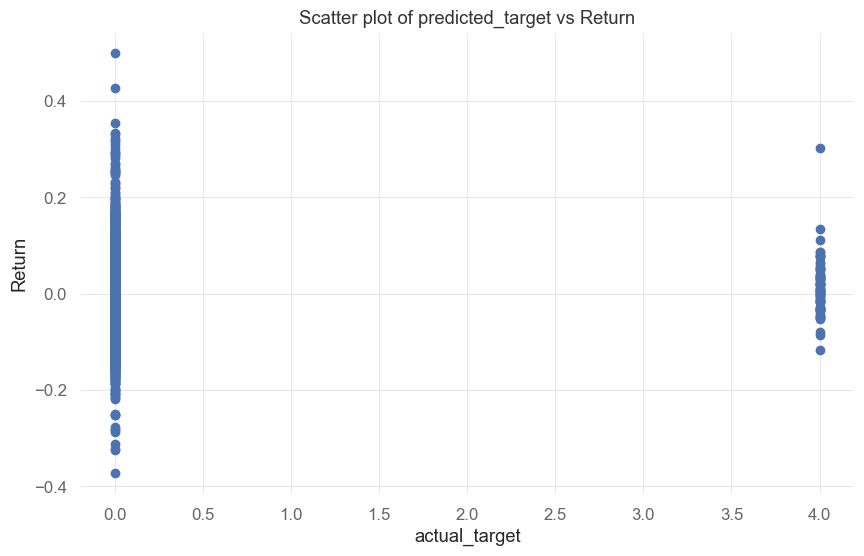

In [24]:
import matplotlib.pyplot as plt

# Assuming `predictions_accumulated` is already defined DataFrame
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x=predictions_accumulated['predicted_target'], y=predictions_accumulated['return'], inner=None, color=".8")
sns.pointplot(x=predictions_accumulated['predicted_target'], y=predictions_accumulated['return'], join=False, capsize=.2)
plt.xlabel('actual_target')
plt.ylabel('Return')
plt.title('Violin plot of predicted_target vs Return with bands')
plt.show()

/var/folders/nq/d3x1j70n57s1b82184345szm0000gn/T/ipykernel_7603/1441379357.py:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x=predictions_accumulated['predicted_target'], y=predictions_accumulated['return'], join=False, capsize=.2)


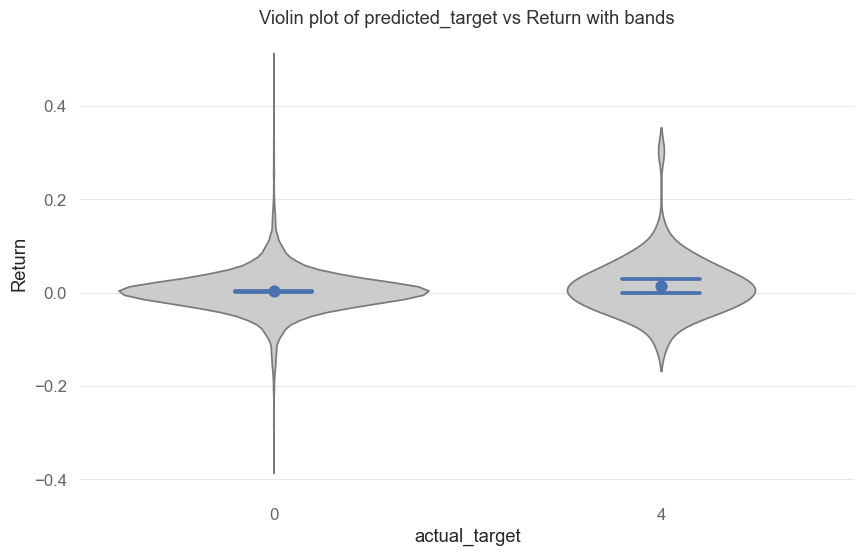

In [25]:
import matplotlib.pyplot as plt

# Assuming `predictions_accumulated` is already defined DataFrame
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x=predictions_accumulated['predicted_target'], y=predictions_accumulated['return'], inner=None, color=".8")
sns.pointplot(x=predictions_accumulated['predicted_target'], y=predictions_accumulated['return'], join=False, capsize=.2)
plt.xlabel('actual_target')
plt.ylabel('Return')
plt.title('Violin plot of predicted_target vs Return with bands')
plt.show()

In [131]:
X_accumulated_tmp = X_in_past_accumulated.copy()
if not isinstance(X_accumulated_tmp.columns, pd.MultiIndex):
    X_accumulated_tmp.columns = pd.MultiIndex.from_tuples([(col, '') for col in X_accumulated_tmp.columns])
if not isinstance(X_accumulated_tmp.index, pd.MultiIndex):
    X_accumulated_tmp.index = pd.MultiIndex.from_tuples([(idx, '') for idx in X_accumulated_tmp.index])
X_accumulated_reshaped = (X_accumulated_tmp.stack(1, future_stack=True)
    .swaplevel(1, 0)
    .sort_index(level=[0, 1], axis='columns')
    .sort_index(level=[0, 1], axis='rows'))
print(X_accumulated_reshaped)

                             adx  alma  ao  atr  bias  bop  cfo  chop  cmf  \
date                ticker                                                   
2022-10-24 14:30:00 AAPL       3     3   1    2     2    3    1     1    2   
                    ADBE       2     1   1    3     2    3    2     2    1   
                    AIG        3     3   2    2     4    4    4     0    4   
                    ALL        0     4   4    0     4    4    4     4    0   
                    AMAT       3     4   0    0     2    3    3     1    2   
...                          ...   ...  ..  ...   ...  ...  ...   ...  ...   
                    WFC        4     2   1    1     3    3    3     0    4   
                    WMT        4     4   0    4     4    4    4     0    0   
                    YUM        0     3   1    2     1    1    1     3    0   
                    ZBH        0     0   3    2     4    2    3     3    3   
                    ZM         1     2   0    1     0    0    0 

In [11]:
import pandas as pd
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

clf = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=42)
# param_grid = {'n_estimators':[1, 500], 'max_depth':[1, 10], 'max_leaf_nodes':[2, 5], 'min_samples_split':[2, 10]} # errors  
param_grid = {'max_depth':[1, 15], 'max_leaf_nodes':[2, 20], 'n_estimators':[1, 2000]}
search = HalvingRandomSearchCV(clf, param_grid, factor=2, n_jobs=-1, random_state=42).fit(X, y)
search.fit(X, y)
print(search.best_params_)  
df = pd.DataFrame(search.cv_results_)
print(df)
# print(search.n_resources_)

/Users/stephanie/src/N-LASR-model/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=264. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/stephanie/src/N-LASR-model/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=264. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 2000, 'max_leaf_nodes': 2, 'max_depth': 15}
    iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
0      0           20       0.001659      0.000126         0.000671   
1      0           20       1.260673      0.111095         0.043250   
2      0           20       0.004161      0.000927         0.001809   
3      0           20       1.302461      0.052727         0.039763   
4      0           20       0.001696      0.000462         0.000646   
5      0           20       1.115357      0.209875         0.029377   
6      0           20       0.002666      0.001416         0.001151   
7      0           20       1.136852      0.213019         0.028842   
8      1           40       1.279284      0.239883         0.040581   
9      1           40       1.353454      0.097901         0.039811   
10     1           40       1.268614      0.096853         0.045079   
11     1           40       1.054001      0.185250         0.024980   
12     2        

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibrationDisplay
import matplotlib as plt
X = X_train; y = y_train

rfc = RandomForestClassifier(max_depth=15, max_leaf_nodes=2, n_estimators=2000, random_state=42).fit(X, y)
scores = cross_val_score(rfc, X, y, cv=5)
scores.mean()
# plt.show()

np.float64(0.8015872590863087)

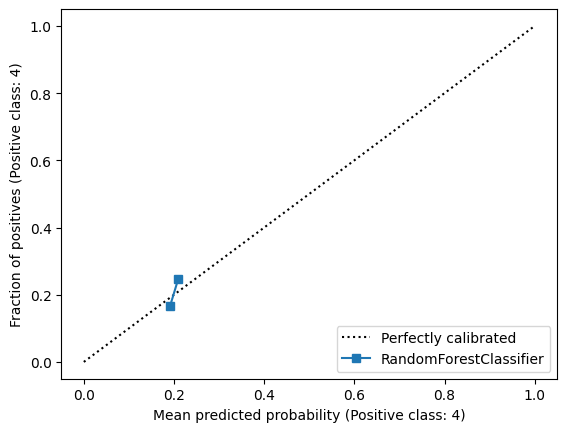

In [32]:
disp = CalibrationDisplay.from_estimator(rfc, X, y)

In [27]:
import pandas as pd
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

X = X_train; y = y_train_bucketed
abc = AdaBoostClassifier(algorithm="SAMME", random_state=42)
param_grid = {'n_estimators':[10, 500], 'learning_rate':[0.1,10]}
search = HalvingGridSearchCV(abc, param_grid, resource='n_samples', factor=2, min_resources='exhaust', n_jobs=-1, random_state=42).fit(X, y)
search.fit(X, y)
print(search.best_params_)  
# df = pd.DataFrame(search.cv_results_)
# print(df)
# print(search.n_resources_)

{'learning_rate': 10, 'n_estimators': 500}


In [25]:
X = X_train; y = y_train_bucketed
abc = AdaBoostClassifier(algorithm="SAMME", n_estimators=500, learning_rate=10, random_state=42)
scores = cross_val_score(abc, X, y, cv=5)
scores.mean()

np.float64(0.8015872590863087)

In [18]:
rfc.feature_importances_ 

array([0.0025, 0.0405, 0.0075, 0.0065, 0.0065, 0.012 , 0.063 , 0.018 ,
       0.009 , 0.005 , 0.0215, 0.0065, 0.0415, 0.0285, 0.0195, 0.0195,
       0.002 , 0.001 , 0.0525, 0.007 , 0.0485, 0.0275, 0.0085, 0.0005,
       0.008 , 0.0095, 0.012 , 0.0045, 0.012 , 0.002 , 0.003 , 0.014 ,
       0.0515, 0.046 , 0.    , 0.005 , 0.006 , 0.065 , 0.0025, 0.0125,
       0.    , 0.016 , 0.0095, 0.0205, 0.0045, 0.0245, 0.0245, 0.0625,
       0.004 , 0.0195, 0.006 , 0.008 , 0.0065, 0.016 , 0.026 , 0.0105,
       0.0025, 0.009 , 0.0005, 0.001 , 0.02  ])

In [20]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(rfc, prefit=True)
X_new = model.transform(X)
X_new.shape   

/Users/stephanie/src/N-LASR-model/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(5292, 21)

In [229]:
from sklearn.ensemble import RandomForestClassifier
X = X_train; y = y_train_bucketed

rfc = RandomForestClassifier(max_depth=15, max_leaf_nodes=2, n_estimators=2000, random_state=42).fit(X, y)
scores = cross_val_score(rfc, X, y, cv=5)
scores.mean()

np.float64(0.8015872590863087)